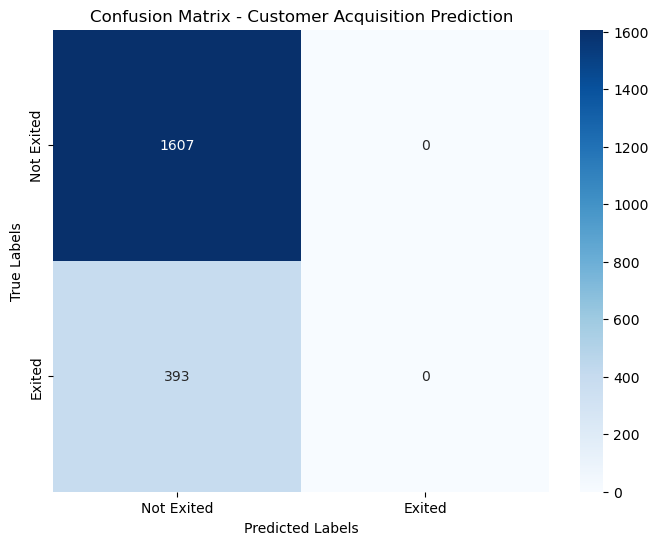

Customer Acquisition Prediction:
Accuracy: 80.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       1.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.80      0.72      2000


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load data from CSV file
data = pd.read_csv('data.csv')

# Decision Trees or Random Forest for Predicting Customer Acquisition
target_variable_acquisition = 'Exited'
features_acquisition = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', target_variable_acquisition])
X_train, X_test, y_train, y_test = train_test_split(features_acquisition, data[target_variable_acquisition], test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = ['Geography', 'Gender', 'Card Type']

# Create pipeline for preprocessing categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess features with categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a Random Forest classifier with preprocessing pipeline
random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model and make predictions
random_forest.fit(X_train, y_train)
predictions_acquisition = random_forest.predict(X_test)
accuracy_acquisition = accuracy_score(y_test, predictions_acquisition)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions_acquisition, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - Customer Acquisition Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print results
print("Customer Acquisition Prediction:")
print(f"Accuracy: {accuracy_acquisition:.2%}")
print("Classification Report:")
print(classification_report(y_test, predictions_acquisition, zero_division=1))


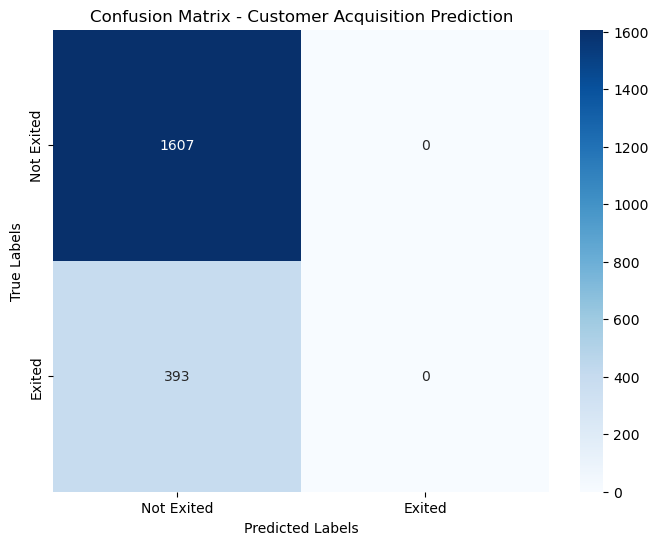

Customer Acquisition Prediction:
Accuracy: 80.35%

Classification Report:
              precision  recall  f1-score    support
0              0.803500  1.0000  0.891045  1607.0000
1              1.000000  0.0000  0.000000   393.0000
accuracy       0.803500  0.8035  0.803500     0.8035
macro avg      0.901750  0.5000  0.445523  2000.0000
weighted avg   0.842112  0.8035  0.715955  2000.0000


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load data from CSV file
data = pd.read_csv('data.csv')

# Decision Trees or Random Forest for Predicting Customer Acquisition
target_variable_acquisition = 'Exited'
features_acquisition = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', target_variable_acquisition])
X_train, X_test, y_train, y_test = train_test_split(features_acquisition, data[target_variable_acquisition], test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = ['Geography', 'Gender', 'Card Type']

# Create pipeline for preprocessing categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess features with categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a Random Forest classifier with preprocessing pipeline
random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model and make predictions
random_forest.fit(X_train, y_train)
predictions_acquisition = random_forest.predict(X_test)
accuracy_acquisition = accuracy_score(y_test, predictions_acquisition)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions_acquisition, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - Customer Acquisition Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print results in a table without warning messages
classification_report_df = pd.DataFrame.from_dict(classification_report(y_test, predictions_acquisition, output_dict=True, zero_division=1)).T
print("Customer Acquisition Prediction:")
print(f"Accuracy: {accuracy_acquisition:.2%}")
print("\nClassification Report:")
print(classification_report_df)


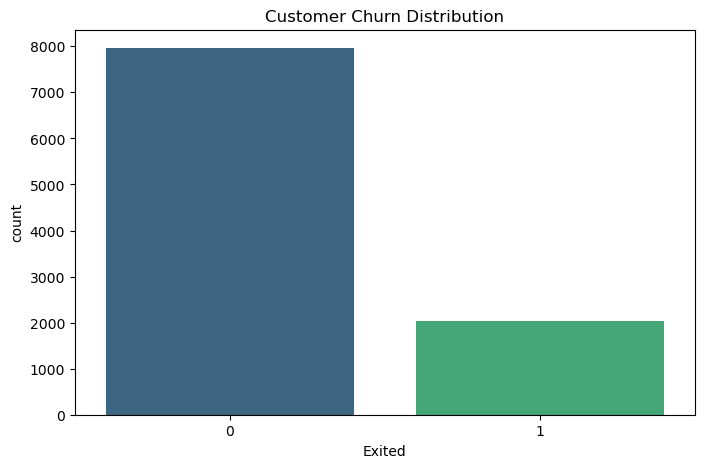

Logistic Regression Model Evaluation:
Accuracy: 0.799
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.43      0.08      0.13       393

    accuracy                           0.80      2000
   macro avg       0.62      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000


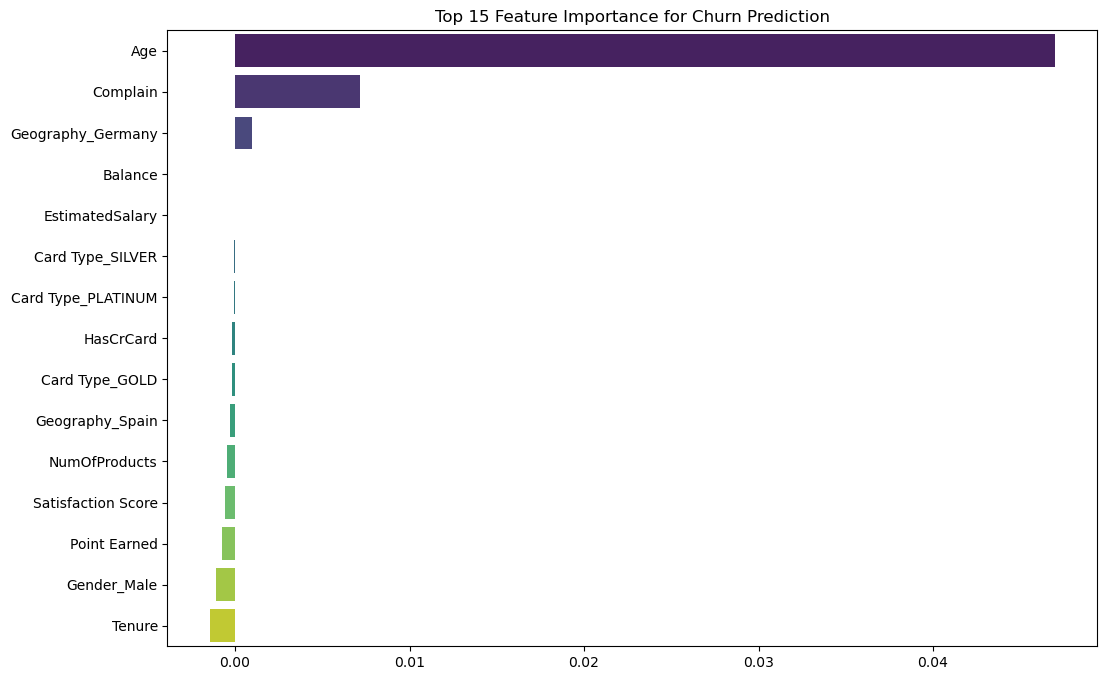

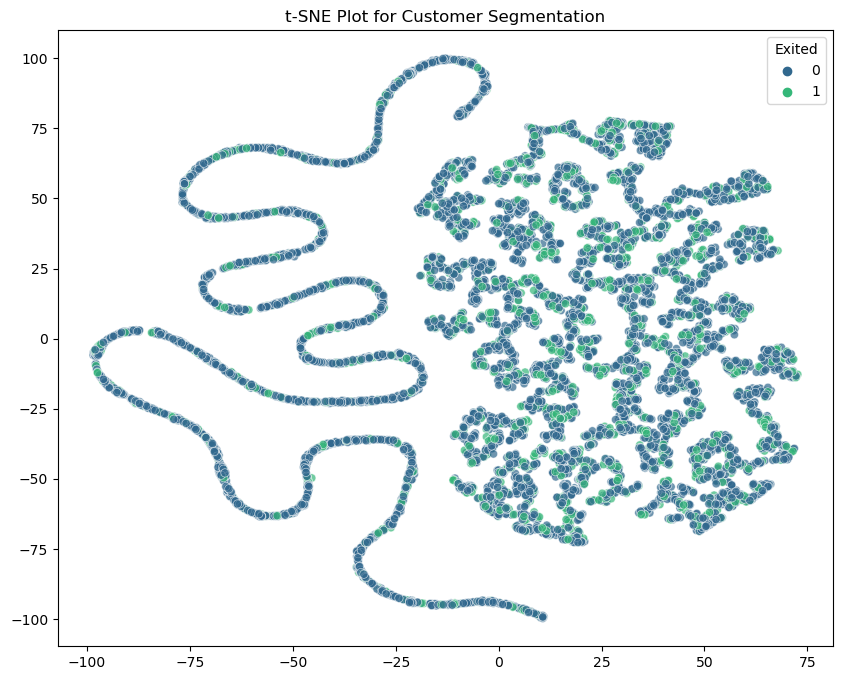

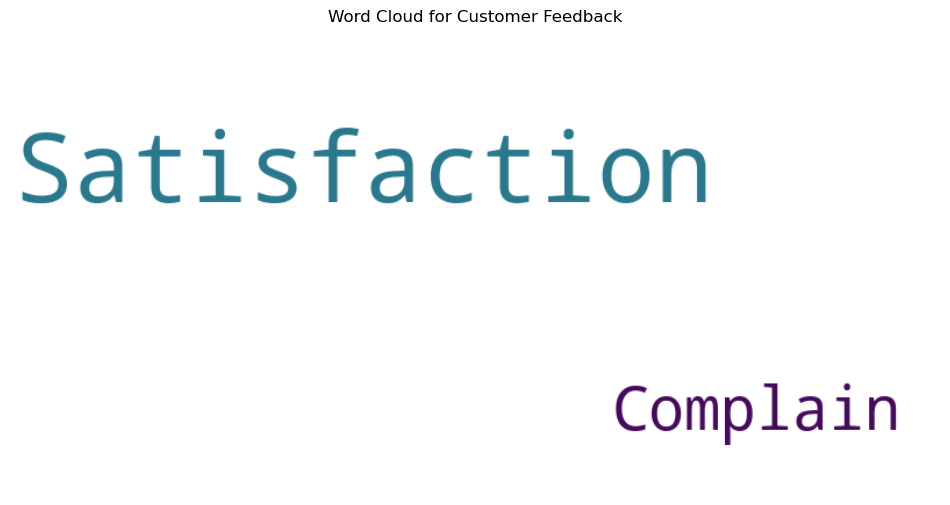

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
from sklearn.manifold import TSNE

# Load your dataset
data = pd.read_csv('data.csv')

# Visualize overall churn distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', data=data, palette='viridis')
plt.title('Customer Churn Distribution')
plt.show()

# Analyze factors using Logistic Regression
# Assume 'Exited' is the target variable
target_variable_churn = 'Exited'
features_churn = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', target_variable_churn])

# Convert categorical variables using one-hot encoding
features_churn_encoded = pd.get_dummies(features_churn, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_churn_encoded, data[target_variable_churn], test_size=0.2, random_state=42)

# Train Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Evaluate the model
predictions_churn = logreg_model.predict(X_test)
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, predictions_churn))
print("Classification Report:")
print(classification_report(y_test, predictions_churn))

# Visualize feature importance
feature_importance = pd.Series(logreg_model.coef_[0], index=features_churn_encoded.columns)
feature_importance = feature_importance.sort_values(ascending=False)[:15]  # Top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Top 15 Feature Importance for Churn Prediction')
plt.show()

# Visualize t-SNE plot for customer segmentation based on features
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_churn_encoded)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=data[target_variable_churn], palette='viridis', alpha=0.7)
plt.title('t-SNE Plot for Customer Segmentation')
plt.show()

# Text Mining (NLP) for analyzing customer feedback
# Assume 'Satisfaction Score' and 'Complain' are used for feedback analysis
feedback_data = data[['Satisfaction Score', 'Complain']].copy()
feedback_data['Feedback'] = feedback_data['Complain'].apply(lambda x: 'Complain' if x == 1 else 'Satisfaction')

# Visualize word cloud for customer feedback
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(feedback_data['Feedback']))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer Feedback')
plt.show()


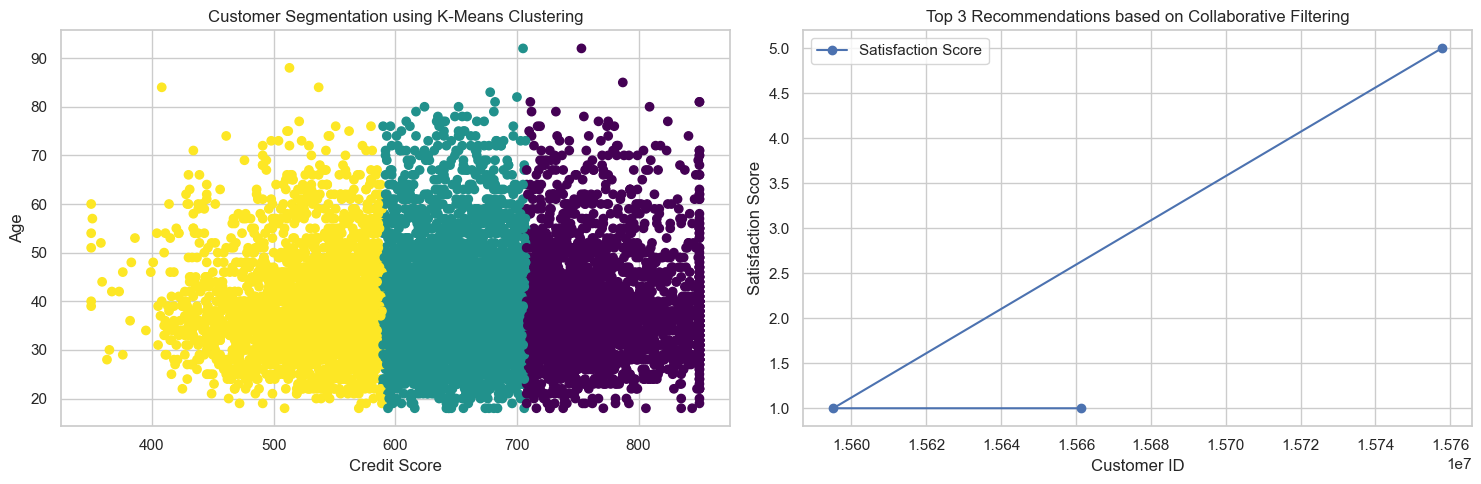

Churn Prediction (Customer Retention) Results:
Accuracy: 80.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       1.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.80      0.72      2000


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity

# Load data
data = pd.read_csv('data.csv')

# K-Means Clustering for Customer Segmentation
features_clustering = data[['CreditScore', 'Age']]
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(features_clustering)

# Collaborative Filtering for Recommending Products/Services
collaborative_features = data[['Satisfaction Score', 'Card Type']]

# Include 'Card Type' in the preprocessing for one-hot encoding
collaborative_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

collaborative_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', collaborative_transformer, ['Card Type'])
    ])

collaborative_features_encoded = collaborative_preprocessor.fit_transform(collaborative_features)

cosine_similarity_matrix = cosine_similarity(collaborative_features_encoded)
customer_index = 0
similar_customers = cosine_similarity_matrix[customer_index].argsort()[:-1][::-1]
top_recommendations = data.iloc[similar_customers[:3]]

# Random Forest for Churn Prediction (Customer Retention)
target_variable_retention = 'Exited'
features_retention = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Cluster', target_variable_retention])
X_train, X_test, y_train, y_test = train_test_split(features_retention, data[target_variable_retention], test_size=0.2, random_state=42)

categorical_features = ['Geography', 'Gender', 'Card Type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])
random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(random_state=42))])

random_forest.fit(X_train, y_train)
predictions_retention = random_forest.predict(X_test)
accuracy_retention = accuracy_score(y_test, predictions_retention)

# Visualize Clusters and Top 3 Recommendations
plt.figure(figsize=(15, 5))

# Scatter plot for customer segmentation
plt.subplot(1, 2, 1)
plt.scatter(data['CreditScore'], data['Age'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Credit Score')
plt.ylabel('Age')

# Line plot for top 3 recommendations
plt.subplot(1, 2, 2)
plt.plot(top_recommendations['CustomerId'], top_recommendations['Satisfaction Score'], marker='o', linestyle='-', label='Satisfaction Score')
plt.title('Top 3 Recommendations based on Collaborative Filtering')
plt.xlabel('Customer ID')
plt.ylabel('Satisfaction Score')
plt.legend()

plt.tight_layout()
plt.show()

# Print results for Random Forest (Churn Prediction)
print("Churn Prediction (Customer Retention) Results:")
print(f"Accuracy: {accuracy_retention:.2%}")
print("Classification Report:")
print(classification_report(y_test, predictions_retention, zero_division=1))
